In [4]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

In [5]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, recall_score, precision_score, classification_report

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline

# 로지스틱 회귀

- 시그모이드 함수 => 이진분류 
- 소프트맥스 함수 => 다중분류

### 시그모이드(sigmoid) 함수의 특징 
```
z 입력에 무엇이 들어가든 함수값이 (0,1)로 제한된다. 
중간 값은 0.5 이다.
매우 큰 값을 가지면 거의 1이며, 매우 작은 값을 가지면 거의 0이다.  
Binary classification에 적절한 함수이다. 
```

z = (회귀계수1*피처값1) + (회귀계수2*피처값2) + .... + 절편

- z를 확률로 변경하여 주는 함수가 시그모이드 함수

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/faaa0c014ae28ac67db5c49b3f3e8b08415a3f2b">

- z가 0이면 0.5. z가 어떤값이 되더라도 0~1사이의 범위가 된다. 

- 0.5를 기준으로 작으면 0 음성클래스, 크면 1 양성클래스 

- 시그모이드 그래프 
<img src="https://mblogthumb-phinf.pstatic.net/MjAyMDA3MDdfMTgx/MDAxNTk0MTMwODg2NzAw.Bgt42rm3pV0xTPfuVjN1UbXw9HchDcAdLdvnsrAQvJ0g.ILAv2yJkoMXNiWHKAUe0QswJWyr84GwwlRbXwxCogKUg.PNG.zzoyou_/sigmoid.png?type=w800" width="50%">

In [7]:
# 시그모이드 함수 구현 
x = np.arange(-5, 5, 0.1)
y = 1 / (1 + np.exp(-x))

In [10]:
x[:5], y[:5]

(array([-5. , -4.9, -4.8, -4.7, -4.6]),
 array([0.00669285, 0.00739154, 0.00816257, 0.0090133 , 0.0099518 ]))

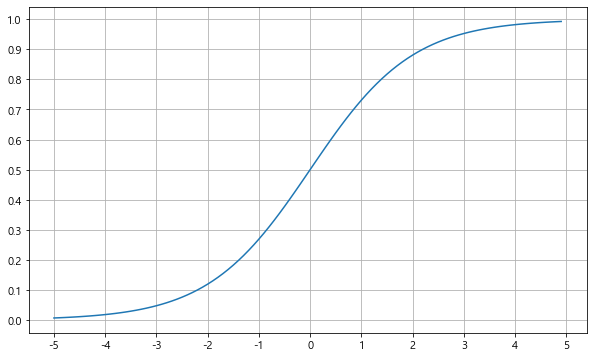

In [12]:
# 시그모이드 시각화 
plt.plot(x, y)
plt.yticks(np.arange(0, 1.1, step=0.1)) #  y 눈금 설정 
plt.xticks(np.arange(-5, 6)) # x눈금 설정  
plt.grid()
plt.show()

### 데이터 준비하기 - 이진분류용 

In [236]:
# ls data\*.csv

In [13]:
wine_df = pd.read_csv('data/redwine.csv')
wine_df.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [14]:
wine_df['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

In [15]:
# 데이타 분리 
X = wine_df[['alcohol','sugar','pH']]
y = wine_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

scale = StandardScaler()
scale.fit(X_train)

X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [16]:
X_train_scaled

array([[-1.16264222,  1.59213805, -1.73132902],
       [-0.49628519, -0.71713049, -0.04729092],
       [ 0.64207473, -0.24044662,  0.26456799],
       ...,
       [-0.41299056, -0.59001479, -0.7957523 ],
       [ 1.91925902, -0.25103959,  2.19809322],
       [ 2.08584828, -0.52645694, -0.54626517]])

In [17]:
# 로지스틱 모델 생성 
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
# 학습 데이타 5개 
X_train_scaled[:5]

array([[-1.16264222,  1.59213805, -1.73132902],
       [-0.49628519, -0.71713049, -0.04729092],
       [ 0.64207473, -0.24044662,  0.26456799],
       [-1.24593685,  2.38661116,  0.13982442],
       [-0.32969594,  0.4692827 , -0.73338052]])

In [20]:
# 학습 데이타 라벨 5개 
y_train[:5]

5797    1.0
1532    0.0
6214    1.0
5150    1.0
4084    1.0
Name: class, dtype: float64

In [22]:
# 실제 라벨 
model_lr.predict(X_train_scaled[:5])

array([1., 1., 1., 1., 1.])

In [24]:
# 라벨 별 확율 
model_lr.predict_proba(X_train_scaled[:5])

array([[0.00644789, 0.99355211],
       [0.41499677, 0.58500323],
       [0.17226491, 0.82773509],
       [0.00672176, 0.99327824],
       [0.05130558, 0.94869442]])

In [25]:
# 기울기(각 피처) , 절편
model_lr.coef_, model_lr.intercept_

(array([[ 0.5686556 ,  1.67908873, -0.70998832]]), array([1.79611169]))

In [26]:
X_train_scaled[0]

array([-1.16264222,  1.59213805, -1.73132902])

In [29]:
# z 값 구하기 1
# 각기울기*각피처  => z 값 
# ax + b 
np.sum(model_lr.coef_*X_train_scaled[0]) + model_lr.intercept_

array([5.03753311])

In [28]:
# z 값 구하기 2 - 사이킷런에서 제공 
# decision_function([X_train_scaled[0]])
decisions = model_lr.decision_function([X_train_scaled[0]])
decisions

array([5.03753311])

In [27]:
X_train_scaled[0]

array([-1.16264222,  1.59213805, -1.73132902])

In [30]:
# predict_proba() 라벨의 확률 
model_lr.predict_proba([X_train_scaled[0]])

array([[0.00644789, 0.99355211]])

In [32]:
# 시그모이드함수 적용 
# 양성클래스의 확률값 
z = model_lr.decision_function([X_train_scaled[0]])
1 / (1 + np.exp(-z))

array([0.99355211])

In [35]:
model_lr.predict_proba([X_train_scaled[0]])

array([[0.00644789, 0.99355211]])

In [36]:
model_lr.predict([X_train_scaled[0]])

array([1.])

## 로지스틱 회귀로 다중 분류 수행하기

#### 소프트맥스 함수
- 0~1 사이의 확률값 (단, 결과 총합이 1이 된다)
- multinomial classification
- 라벨 분류값이 하나일 때 사용되는 시그모이드 함수를 라벨 분류값이 여러개일 때도 사용할 수 있도록 일반화 한 것이다

<img src='https://ichi.pro/assets/images/max/724/1*jf_Qr_etCPtIKq7NYa6F_w.png' width="50%">

## 데이터 준비하기 

In [37]:
from sklearn.datasets import load_wine

In [38]:
wine_data = load_wine()
wine_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [39]:
# 데이타 프레임화 
wine_df2 = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
# y 라벨 컬럼 추가 
wine_df2['target'] = wine_data.target
wine_df2.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [40]:
wine_df2['target'].unique()

array([0, 1, 2])

In [41]:
wine_df2['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [42]:
wine_df2.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [43]:
wine_df2.shape

(178, 14)

In [44]:
wine_df2.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [45]:
# 데이타 분리 
X = wine_df2.loc[:, :'proline']
y = wine_df2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [46]:
#  KNeighbors()
model_kn = KNeighborsClassifier(n_neighbors=3)
model_kn.fit(X_train_scaled, y_train)

print(model_kn.score(X_train_scaled, y_train))
print(model_kn.score(X_test_scaled, y_test))

0.9774436090225563
0.9555555555555556


In [47]:
#  DecisionTreeClassifier()
model_dt = DecisionTreeClassifier(random_state=11)
model_dt.fit(X_train_scaled, y_train)

print(model_dt.score(X_train_scaled, y_train))
print(model_dt.score(X_test_scaled, y_test))

1.0
0.9555555555555556


In [48]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

print(model_lr.score(X_train_scaled, y_train))
print(model_lr.score(X_test_scaled, y_test))

1.0
1.0


In [49]:
print(classification_report(y_test, model_lr.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [50]:
# 타겟 확률 
model_lr.predict_proba([X_test_scaled[0]])

array([[0.92581337, 0.07255281, 0.00163382]])

In [53]:
# 실제 정답 
y_test[35], y_test.to_numpy()[0]

(0, 0)

In [54]:
# 타겟 라벨 확인 
model_lr.classes_

array([0, 1, 2])

In [55]:
wine_df2.shape

(178, 14)

In [23]:
# 기울기, 절편 
# 기울기는? (라벨수, 피처갯수 ), 절편은? 라벨수
model_lr.coef_.shape, model_lr.intercept_.shape

((3, 13), (3,))

In [24]:
# 기울기 
model_lr.coef_

array([[ 0.40517953,  0.03727994,  0.21319388, -0.39877465,  0.0623688 ,
         0.21671622,  0.37726351, -0.11884924,  0.06219045,  0.09513502,
         0.09829367,  0.31800137,  0.51189239],
       [-0.49616871, -0.27431288, -0.35949821,  0.2466096 , -0.08938557,
         0.00713682,  0.06386366,  0.02938358,  0.17592569, -0.5094379 ,
         0.30631904,  0.05915978, -0.47227749],
       [ 0.09098918,  0.23703294,  0.14630432,  0.15216505,  0.02701677,
        -0.22385304, -0.44112717,  0.08946566, -0.23811614,  0.41430288,
        -0.40461271, -0.37716115, -0.0396149 ]])

In [25]:
# 기울기*피처 + 절편 
print(model_lr.coef_[0], X_test_scaled[0], model_lr.intercept_[0])
print()
print(model_lr.coef_[1], X_test_scaled[0], model_lr.intercept_[1])
print()
print(model_lr.coef_[2], X_test_scaled[0], model_lr.intercept_[2])

[ 0.40517953  0.03727994  0.21319388 -0.39877465  0.0623688   0.21671622
  0.37726351 -0.11884924  0.06219045  0.09513502  0.09829367  0.31800137
  0.51189239] [ 0.64055666 -0.48144861  0.15904201  0.23809346  0.          0.66522952
  1.033603   -0.85892977  0.43758133  0.03911337  0.4011093   1.28190432
  0.56819862] 0.07655073681136179

[-0.49616871 -0.27431288 -0.35949821  0.2466096  -0.08938557  0.00713682
  0.06386366  0.02938358  0.17592569 -0.5094379   0.30631904  0.05915978
 -0.47227749] [ 0.64055666 -0.48144861  0.15904201  0.23809346  0.          0.66522952
  1.033603   -0.85892977  0.43758133  0.03911337  0.4011093   1.28190432
  0.56819862] 0.531097829809003

[ 0.09098918  0.23703294  0.14630432  0.15216505  0.02701677 -0.22385304
 -0.44112717  0.08946566 -0.23811614  0.41430288 -0.40461271 -0.37716115
 -0.0396149 ] [ 0.64055666 -0.48144861  0.15904201  0.23809346  0.          0.66522952
  1.033603   -0.85892977  0.43758133  0.03911337  0.4011093   1.28190432
  0.56819862] 

In [56]:
model_lr.predict(X_test_scaled)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 1, 0, 1,
       1])

In [57]:
# z 값 구하기 1
for i in range(3) :
    print(np.sum(model_lr.coef_[i]*X_test_scaled[0])+model_lr.intercept_[i])

2.962037026419022
0.4156791279772678
-3.3777161543962775


In [59]:
# z 값 구하기 2
decision = model_lr.decision_function([X_test_scaled[0]])
decision
# np.round(decision, decimals=2)

array([[ 2.96203703,  0.41567913, -3.37771615]])

In [68]:
# softmax 1
from scipy.special import softmax

# z 값 구하기 
decision = model_lr.decision_function([X_test_scaled[0]])
# 라벨의 확률 
proba = softmax(decision, axis=1)
np.round(proba, decimals=3)
proba

array([[0.92581337, 0.07255281, 0.00163382]])

In [66]:
# 모델의 predict_proba([X_test_scaled[0]])
model_lr.predict_proba([X_test_scaled[0]])

array([[0.92581337, 0.07255281, 0.00163382]])

### softmax 2 - 소프트맥스 함수 공식에 의해서 확률 구하기 

<img src='https://ichi.pro/assets/images/max/724/1*jf_Qr_etCPtIKq7NYa6F_w.png' width="50%">

In [71]:
# 2차원
decision, decision.shape

(array([[ 2.96203703,  0.41567913, -3.37771615]]), (1, 3))

In [72]:
# 1차원으로 풀이 
decision[0]

array([ 2.96203703,  0.41567913, -3.37771615])

In [74]:
# np.exp(z값(라벨별)[0])
expL = np.exp(decision[0])
# sum(np.exp(z값(라벨별)[0]))
sumExpL = sum(expL)

print(expL)
print(sumExpL)

result = []
for i in expL:
    result.append(i/sumExpL) 

print(result)

[19.3373223   1.51539954  0.0341253 ]
20.88684714350501
[0.9258133679240814, 0.07255281427218248, 0.0016338178037360943]


In [75]:
# array([[0.92581337, 0.07255281, 0.00163382]])

In [64]:
# 함수구현 
def softmax2(L):
    expL = np.exp(L) 
    sumExpL = sum(expL) 
    result = []
    for i in expL:
        result.append(i/sumExpL) 
    return result

In [76]:
softmax2(decision[0])

[0.9258133679240814, 0.07255281427218248, 0.0016338178037360943]

# 퀴즈 

1) 아래의 주소를 이용하여 데이타셋을 생성하여라 

'https://bit.ly/fish_csv'

2) 물고기의 종류는 다음과 같다. 

['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']

도미(Bream) 와 빙어(Smelt) 만 추출하여 새로운 데이타셋 bream_smelt 을 생성하고 
이진분류 모델을 구축하고 테스트하여라 (2진분류) 

3) 1의 데이타셋을 이용하여 다중 분류 모델을 구축하고 테스트하여라.(다중분류) 


In [79]:
df_fish = pd.read_csv('https://bit.ly/fish_csv')
df_fish.sample(5)

,Species,Weight,Length,Diagonal,Height,Width
29,Bream,1000.0,37.0,42.6,18.9570,6.6030
38,Roach,87.0,19.8,22.2,5.6166,3.1746
116,Perch,900.0,39.0,41.4,11.1366,7.4934
68,Parkki,145.0,21.5,24.1,9.7364,3.1571
147,Smelt,7.0,10.6,11.6,1.7284,1.1484


In [80]:
df_fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [81]:
df_fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [82]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [83]:
# df_fish['Weight'] 0 확인 => 전처리 필요 
df_fish.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [84]:
# 무게가 0인 생선은 누구? 
df_fish[df_fish['Weight'] == 0]

,Species,Weight,Length,Diagonal,Height,Width
40,Roach,0.0,20.5,22.8,6.4752,3.3516


In [85]:
df_fish[df_fish['Species'] == 'Roach']

,Species,Weight,Length,Diagonal,Height,Width
35,Roach,40.0,14.1,16.2,4.1472,2.2680
36,Roach,69.0,18.2,20.3,5.2983,2.8217
37,Roach,78.0,18.8,21.2,5.5756,2.9044
38,Roach,87.0,19.8,22.2,5.6166,3.1746
39,Roach,120.0,20.0,22.2,6.2160,3.5742
40,Roach,0.0,20.5,22.8,6.4752,3.3516
41,Roach,110.0,20.8,23.1,6.1677,3.3957
42,Roach,120.0,21.0,23.7,6.1146,3.2943
43,Roach,150.0,22.0,24.7,5.8045,3.7544
44,Roach,145.0,22.0,24.3,6.6339,3.5478


In [87]:
df_fish[df_fish['Species'] == 'Roach']['Weight'].mean()

152.05

In [90]:
df_fish[df_fish['Weight'] == 0].index

Int64Index([40], dtype='int64')

In [92]:
df_fish.iloc[df_fish[df_fish['Weight'] == 0].index, :]['Weight']

40    0.0
Name: Weight, dtype: float64

In [96]:
mean_value = df_fish[df_fish['Species'] == 'Roach']['Weight'].mean()
mean_value

152.05

In [99]:
df_fish.iloc[df_fish[df_fish['Weight'] == 0].index, 1] = mean_value

In [101]:
# df_fish[df_fish['Species'] == 'Roach']

In [107]:
# 도미(Bream) 와 빙어(Smelt) 만 추출
bream_smelt = df_fish[(df_fish['Species'] == 'Bream') | (df_fish['Species']== 'Smelt')]
bream_smelt.sample(5)

,Species,Weight,Length,Diagonal,Height,Width
1,Bream,290.0,26.3,31.2,12.4800,4.3056
10,Bream,475.0,31.0,36.2,14.2628,5.1042
4,Bream,430.0,29.0,34.0,12.4440,5.1340
146,Smelt,7.5,10.5,11.6,1.9720,1.1600
26,Bream,720.0,35.0,40.6,16.3618,6.0900


In [108]:
bream_smelt.shape

(49, 6)

In [111]:
fish_X = bream_smelt.loc[:, 'Weight':]
fish_target = bream_smelt[['Species']]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_target, random_state=42)

In [113]:
scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [121]:
# model_lr = LogisticRegression(C=0.001)
model_lr = LogisticRegression(C=1)
model_lr.fit(X_train_scaled, y_train)

print(model_lr.score(X_train_scaled, y_train))
print(model_lr.score(X_test_scaled, y_test))

1.0
1.0


In [117]:
# 성능 평가 지표 
print(classification_report(y_test, model_lr.predict(X_test_scaled)))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
       Smelt       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [125]:
model_lr.predict(X_test_scaled[:5])

array(['Bream', 'Smelt', 'Smelt', 'Smelt', 'Bream'], dtype=object)

In [151]:
fish_X = df_fish.loc[:, 'Weight':]
fish_target = df_fish[['Species']]
X_train, X_test, y_train, y_test = train_test_split(fish_X, fish_target, random_state=42)

scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

# model_lr2 = LogisticRegression(C=100)
model_lr2 = LogisticRegression()
model_lr2.fit(X_train_scaled, y_train)
model_lr2.fit(X_test_scaled, y_test)


LogisticRegression()

In [152]:
print(model_lr2.score(X_train_scaled, y_train))
print(model_lr2.score(X_test_scaled, y_test))

0.7394957983193278
0.8
